In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/earth-animals/alien_animals_full_50.csv


# 🌌 BioMorphoRegressor (BMR) – Predicting Alien Morphology from Environmental Conditions

---

## 🎯 Goal

To explore whether environmental conditions — such as atmospheric composition, humidity, UV radiation, and water availability — can be used to **predict the physical form (morphology)** of hypothetical alien organisms.

---

## 🧠 Hypothesis

> *The morphology of living organisms (e.g., number of limbs, skin type, eye position) is not random but strongly shaped by planetary environmental factors.*

Specifically:
- High humidity + water presence → membrane wings or aquatic skin
- Cold, mountainous environments → fur or thicker structures
- Dry and high UV → skin, scales, or fewer appendages
- Resource-rich planets → more complex, predatory morphologies

---

## ✅ Achievement

- Designed a method: **BioMorphoRegressor (BMR)** — a multi-output ML pipeline that predicts 7 biological traits based on 6 environmental inputs.
- Created a custom dataset combining modern and Jurassic species under simulated atmospheric conditions.
- Trained a joint RandomForest-based model with interpretability and inference support.
- Tested predictions across realistic planet types (e.g., hot desert, oceanic, mountainous) — results show **consistent and explainable adaptation patterns**.

🧬 **Result**: The model consistently generates plausible alien morphologies in response to different planetary environments — supporting the core hypothesis and providing a working MVP.


In [38]:
df = pd.read_csv("/kaggle/input/alien-dataset/Augmented_Alien_Dataset.csv")
df.head()

,era,species,num_legs,num_arms,symmetry,diet,skin_type,eyes,eye_position,size_m,oxygen_pct,nitrogen_pct,uv_level,humidity,water_presence
0,modern,elephant,4,0,bilateral,herbivore,skin,2,side,3.500,21.0,78.0,medium,medium,high
1,modern,housefly,6,0,bilateral,herbivore,exoskeleton,2,around,0.005,21.0,78.0,medium,high,none
2,modern,frog,4,0,bilateral,carnivore,moist skin,2,front,0.100,21.0,78.0,high,high,high
3,modern,hawk,2,2,bilateral,carnivore,feathers,2,front,0.600,21.0,78.0,high,medium,medium
4,modern,shark,0,0,bilateral,carnivore,scales,2,side,2.500,21.0,78.0,medium,high,high


In [39]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 45.62it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


🎯 Target: num_legs
✅ Accuracy: 0.698
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.70      0.88      0.78        16
           2       0.77      0.71      0.74        34
           3       1.00      0.50      0.67         2

    accuracy                           0.70        63
   macro avg       0.73      0.63      0.66        63
weighted avg       0.71      0.70      0.70        63



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


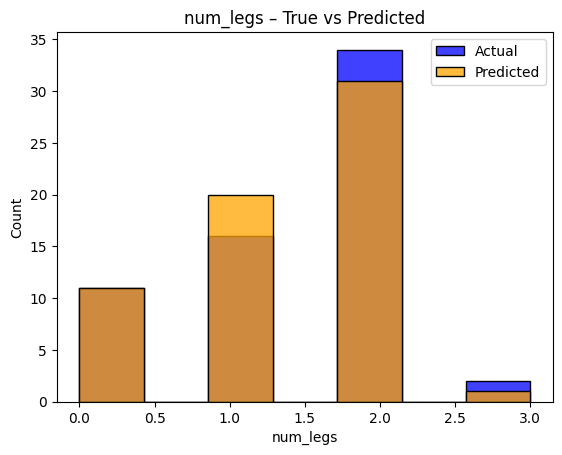


🎯 Target: num_arms
✅ Accuracy: 0.873
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        44
           1       0.75      0.94      0.83        16
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.87        63
   macro avg       0.67      0.71      0.69        63
weighted avg       0.85      0.87      0.86        63



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


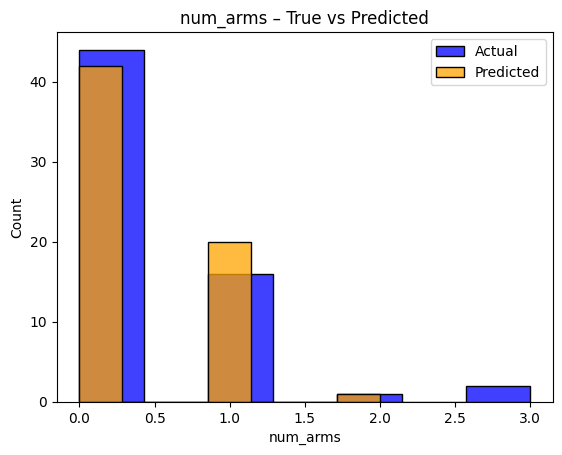


🎯 Target: eyes
✅ Accuracy: 0.952
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.95      1.00      0.98        60

    accuracy                           0.95        63
   macro avg       0.48      0.50      0.49        63
weighted avg       0.91      0.95      0.93        63



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


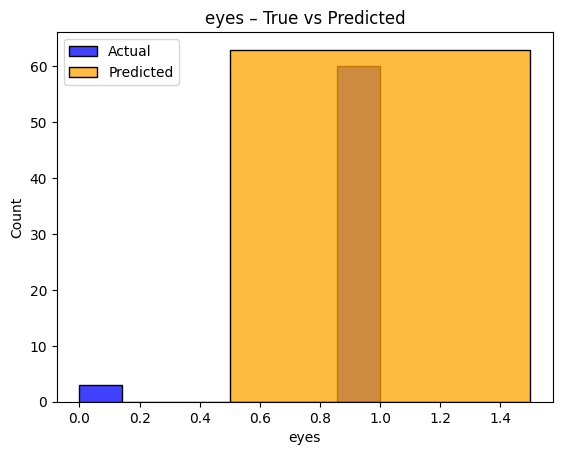


🎯 Target: symmetry
✅ Accuracy: 0.937
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.67      0.40      0.50         5

    accuracy                           0.94        63
   macro avg       0.81      0.69      0.73        63
weighted avg       0.93      0.94      0.93        63



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


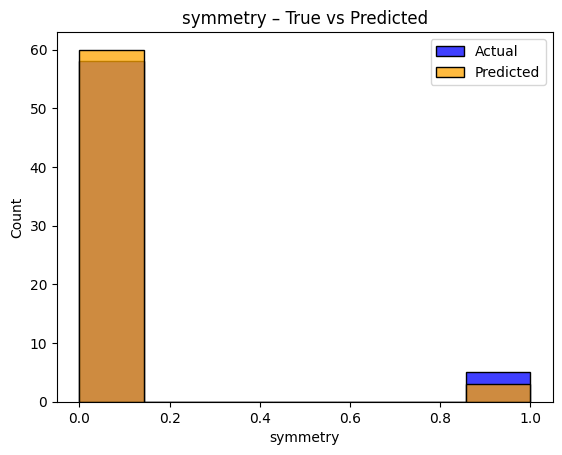


🎯 Target: diet
✅ Accuracy: 0.698
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        29
           1       0.78      0.64      0.70        33
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.70        63
   macro avg       0.36      0.36      0.36        63
weighted avg       0.72      0.70      0.70        63



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


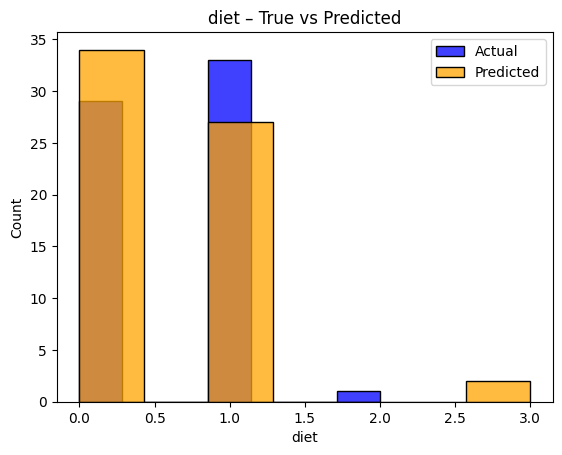


🎯 Target: skin_type
✅ Accuracy: 0.667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.84      0.76      0.80        21
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           7       0.76      0.79      0.78        24
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.75      0.60      0.67         5
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         0

    accuracy                           0.67        63
   macro avg       0.41      0.36      0.38        63
weighted avg       0.71      0.67      0.68        63



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


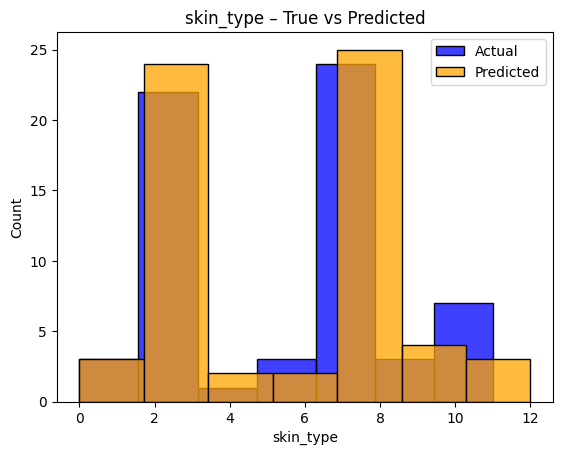

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



🎯 Target: eye_position
✅ Accuracy: 0.730
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.65      0.77      0.70        26
           2       0.00      0.00      0.00         3
           3       0.81      0.76      0.78        33

    accuracy                           0.73        63
   macro avg       0.61      0.63      0.62        63
weighted avg       0.70      0.73      0.71        63



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


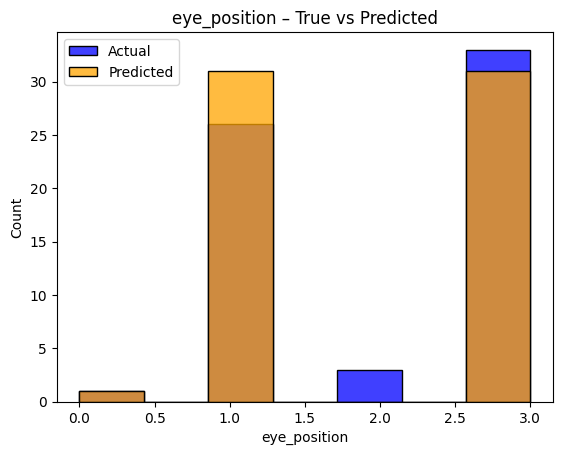

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load and prepare data ===
df = pd.read_csv("/kaggle/input/alien-dataset/Augmented_Alien_Dataset.csv")

# Targets we want to predict
target_classification = ["num_legs", "num_arms", "eyes", "symmetry", "diet", "skin_type", "eye_position"]

# Categorical features that need label encoding
categorical_features = ["uv_level", "humidity", "water_presence"]

# Features used as input to the model
features = ["oxygen_pct", "nitrogen_pct", "uv_level", "humidity", "water_presence", "size_m"]

# Encode categorical variables (both input and target)
data = df.copy()
label_encoders = {}
for col in categorical_features + target_classification:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
X = data[features]
X_scaled = scaler.fit_transform(X)

# Targets (multi-output classification)
y_all = data[target_classification]

# === 2. Train one joint model (BioMorphoRegressor) ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_all, random_state=42)

base_model = RandomForestClassifier(random_state=42)
multi_model = MultiOutputClassifier(base_model)
multi_model.fit(X_train, y_train)

# === 3. Evaluate performance per target ===
y_pred = multi_model.predict(X_test)

for i, target in enumerate(target_classification):
    acc = accuracy_score(y_test[target], y_pred[:, i])
    print(f"\n🎯 Target: {target}")
    print(f"✅ Accuracy: {acc:.3f}")
    print(classification_report(y_test[target], y_pred[:, i], zero_division=0))

    # Quick comparison: True vs Predicted distribution
    plt.figure()
    sns.histplot(y_test[target], color="blue", label="Actual", kde=False, stat="count")
    sns.histplot(y_pred[:, i], color="orange", label="Predicted", kde=False, stat="count")
    plt.title(f"{target} – True vs Predicted")
    plt.legend()
    plt.show()

# === 4. Inference function (predict from raw planet conditions) ===
def predict_alien_all(planet_conditions: dict):
    encoded_input = planet_conditions.copy()
    # Encode incoming categorical values
    for col in categorical_features:
        encoded_input[col] = label_encoders[col].transform([planet_conditions[col]])[0]

    # Transform input into model-ready vector
    input_vector = pd.DataFrame([encoded_input])[features]
    input_scaled = scaler.transform(input_vector)

    # Predict using the full multi-output model
    pred_all = multi_model.predict(input_scaled)[0]

    # Decode prediction back to original labels
    decoded_output = {}
    for i, target in enumerate(target_classification):
        decoded_output[target] = label_encoders[target].inverse_transform([pred_all[i]])[0]

    return decoded_output

In [37]:
# === 5. Predict examples for various planet types ===

example_planets = {
    "Water-rich planet": {
        'oxygen_pct': 25,
        'nitrogen_pct': 72,
        'uv_level': 'low',
        'humidity': 'high',
        'water_presence': 'high',
        'size_m': 1.0
    },
    "Mountainous planet": {
        'oxygen_pct': 18,
        'nitrogen_pct': 80,
        'uv_level': 'medium',
        'humidity': 'low',
        'water_presence': 'medium',
        'size_m': 1.5
    },
    "Hot desert planet": {
        'oxygen_pct': 14,
        'nitrogen_pct': 83,
        'uv_level': 'high',
        'humidity': 'low',
        'water_presence': 'none',
        'size_m': 0.6
    },
    "Dry and thin atmosphere": {
        'oxygen_pct': 10,
        'nitrogen_pct': 85,
        'uv_level': 'high',
        'humidity': 'low',
        'water_presence': 'none',
        'size_m': 0.8
    },
    "All-rich jungle planet": {
        'oxygen_pct': 29,
        'nitrogen_pct': 70,
        'uv_level': 'low',
        'humidity': 'high',
        'water_presence': 'high',
        'size_m': 1.2
    }
}

for name, planet in example_planets.items():
    prediction = predict_alien_all(planet)
    print(f"\n🌍 {name}")
    print("Input:", planet)
    print("👽 Predicted Alien Features:", prediction)



🌍 Water-rich planet
Input: {'oxygen_pct': 25, 'nitrogen_pct': 72, 'uv_level': 'low', 'humidity': 'high', 'water_presence': 'high', 'size_m': 1.0}
👽 Predicted Alien Features: {'num_legs': 2, 'num_arms': 2, 'eyes': 2, 'symmetry': 'bilateral', 'diet': 'carnivore', 'skin_type': 'membrane wings', 'eye_position': 'front'}

🌍 Mountainous planet
Input: {'oxygen_pct': 18, 'nitrogen_pct': 80, 'uv_level': 'medium', 'humidity': 'low', 'water_presence': 'medium', 'size_m': 1.5}
👽 Predicted Alien Features: {'num_legs': 2, 'num_arms': 0, 'eyes': 2, 'symmetry': 'bilateral', 'diet': 'herbivore', 'skin_type': 'fur', 'eye_position': 'front'}

🌍 Hot desert planet
Input: {'oxygen_pct': 14, 'nitrogen_pct': 83, 'uv_level': 'high', 'humidity': 'low', 'water_presence': 'none', 'size_m': 0.6}
👽 Predicted Alien Features: {'num_legs': 4, 'num_arms': 0, 'eyes': 2, 'symmetry': 'bilateral', 'diet': 'herbivore', 'skin_type': 'skin', 'eye_position': 'front'}

🌍 Dry and thin atmosphere
Input: {'oxygen_pct': 10, 'nitro